In [9]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Experiment parameters

In [10]:
# Number of time windows
T = 8

# Target 1-coverage for conformal prediction
alpha = 0.1

data_name = "SBM"

## Load results

In [11]:
results_file = 'results/Conformal_GNN_SBM_Results_Final_10_100_50.pkl'

with open(results_file, 'rb') as file:
    results = pickle.load(file)

Save figures into a special folder.

In [12]:
save_figs = False
output_file_prefix = 'figures/SBM_'
output_file_suffix = '_10_100_50.pdf'

## Summary results

In [13]:
methods = ['BD', 'UA']
GNN_models = ['GCN', 'GAT']
regimes = ['Trans', 'Semi-Ind']
outputs = ['Accuracy', 'Avg Size', 'Coverage']

In [14]:
methods_list = []
GNN_models_list = []
regimes_list = []
outputs_list = []
stat_types_list = []
stats_list = []

for (method, GNN_model, regime, output) in product(methods, GNN_models, regimes, outputs):
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('Mean')
    stats_list.append(np.round(np.mean(results[method][GNN_model][regime][output]['All']), 3))
    
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('St Dev')
    stats_list.append(np.round(np.std(results[method][GNN_model][regime][output]['All']), 3))
    
output = "TSC"
for (method, GNN_model, regime) in product(methods, GNN_models, regimes):
    if regime == "Semi-Ind":
        num_vals = 50
    elif regime == "Trans":
        num_vals = 1000

    T_output = np.where(np.array([len(results[method][GNN_model][regime]["Coverage"][t]) for t in range(T)]) > 0)[0]


    covs = np.zeros((T, num_vals))
    for t in T_output:
        covs[t] = results[method][GNN_model][regime]["Coverage"][t]

    # min_covs = []
    # for cov_run in range(num_vals):
    #     covs_for_run = covs[:, cov_run]
    #     covs_for_run = covs_for_run[covs_for_run > 0]
    #     min_covs.append(np.min(covs_for_run))

    TSC = []
    for t in T_output:
        TSC.append(np.mean(covs[t, :]))

    min_TSC_idx = np.argmin(TSC)
    min_TSC = TSC[min_TSC_idx]
    std_min_TSC = np.std(covs[T_output[min_TSC_idx], :])


    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('Mean')
    stats_list.append(np.round(min_TSC, 3))

    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('St Dev')
    stats_list.append(np.round(std_min_TSC, 3)) 



    
df_summary = pd.DataFrame({
    'method'   : methods_list,
    'GNN model': GNN_models_list,
    'regime'   : regimes_list,
    'output'   : outputs_list,
    'statistic': stat_types_list,
    'value'    : stats_list
})

In [22]:
df_summary["name"] = df_summary["method"] + " " + df_summary["GNN model"]

replace_dict = {
    "BD GCN": "Block GCN",
    "BD GAT": "Block GAT",
    "UA GCN": "UGCN",
    "UA GAT": "UGAT",
}

df_summary["name"] = df_summary["name"].replace(replace_dict)


Display full table of statistics.

In [23]:
print(df_summary)

   method GNN model    regime    output statistic  value       name
0      BD       GCN     Trans  Accuracy      Mean  0.964  Block GCN
1      BD       GCN     Trans  Accuracy    St Dev  0.011  Block GCN
2      BD       GCN     Trans  Avg Size      Mean  1.258  Block GCN
3      BD       GCN     Trans  Avg Size    St Dev  0.053  Block GCN
4      BD       GCN     Trans  Coverage      Mean  0.901  Block GCN
..    ...       ...       ...       ...       ...    ...        ...
59     UA       GCN  Semi-Ind       TSC    St Dev  0.030       UGCN
60     UA       GAT     Trans       TSC      Mean  0.877       UGAT
61     UA       GAT     Trans       TSC    St Dev  0.040       UGAT
62     UA       GAT  Semi-Ind       TSC      Mean  0.907       UGAT
63     UA       GAT  Semi-Ind       TSC    St Dev  0.031       UGAT

[64 rows x 7 columns]


In [16]:
df_summary[df_summary['output'] == 'TSC']

,method,GNN model,regime,output,statistic,value
48,BD,GCN,Trans,TSC,Mean,0.783
49,BD,GCN,Trans,TSC,St Dev,0.091
50,BD,GCN,Semi-Ind,TSC,Mean,0.645
51,BD,GCN,Semi-Ind,TSC,St Dev,0.055
52,BD,GAT,Trans,TSC,Mean,0.856
53,BD,GAT,Trans,TSC,St Dev,0.068
54,BD,GAT,Semi-Ind,TSC,Mean,0.450
55,BD,GAT,Semi-Ind,TSC,St Dev,0.154
56,UA,GCN,Trans,TSC,Mean,0.806
57,UA,GCN,Trans,TSC,St Dev,0.044


In [28]:
output="TSC"

table_start_str = (
    "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|l|l|l|}\n\\hline\nEmbedding & \\multicolumn{2}{c|}{"
    + data_name
    + "} \\\ \n\\cline{2-3}\n& Trans. & Semi-ind.  \\\ \n\\hline\n"
)

# table_data_1 = "ISE & $0.505 \\pm 0.000$ & $0.248 \\pm 0.000$ \\\\ \\hline\n"


table_data = ""
# Loop over each unique method + regime pair
for (GNN_model, method) in product(GNN_models, methods):

    max_trans_acc = df_summary[
        (df_summary["regime"] == "Trans") & (df_summary["output"] == output) & (df_summary["GNN model"] == GNN_model)
    ]["value"].max()
    max_semi_ind_acc = df_summary[
        (df_summary["regime"] == "Semi-Ind") & (df_summary["output"] == output) & (df_summary["GNN model"] == GNN_model)
    ]["value"].max()

    trans_acc = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Trans")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    trans_std = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Trans")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]
    semi_ind_acc = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    semi_ind_std = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]

    method_name = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
    ]["name"].values[0]
    

    if trans_acc != max_trans_acc:
        table_data += f"{method_name} & {trans_acc:.3f} $\\pm$ {trans_std:.3f}"
    else:
        table_data += (
            method_name + " & \\textbf{" + f"{trans_acc:.3f} $\\pm$ {trans_std:.3f}" + "}"
        )

    if semi_ind_acc != max_semi_ind_acc:
        table_data += f" & ${semi_ind_acc:.3f} \\pm {semi_ind_std:.3f}$ \\\\ \\hline\n"
    else:
        table_data += (
            " & \\textbf{"
            + f"{semi_ind_acc:.3f} $\\pm$ {semi_ind_std:.3f}"
            + "} \\\\ \\hline\n"
        )

table_end_str = (
    "\\end{tabular}\n\\caption{}\n\\label{tab:"
    + data_name
    + "_"+output+"}\n\\end{table}"
)

full_table = table_start_str + table_data + table_end_str

print(full_table)

\begin{table}[h]
\centering
\begin{tabular}{|l|l|l|}
\hline
Embedding & \multicolumn{2}{c|}{SBM} \\ 
\cline{2-3}
& Trans. & Semi-ind.  \\ 
\hline
Block GCN & 0.783 $\pm$ 0.091 & $0.645 \pm 0.055$ \\ \hline
UGCN & \textbf{0.806 $\pm$ 0.044} & \textbf{0.869 $\pm$ 0.030} \\ \hline
Block GAT & 0.856 $\pm$ 0.068 & $0.450 \pm 0.154$ \\ \hline
UGAT & \textbf{0.877 $\pm$ 0.040} & \textbf{0.907 $\pm$ 0.031} \\ \hline
\end{tabular}
\caption{}
\label{tab:SBM_TSC}
\end{table}


## Plot results

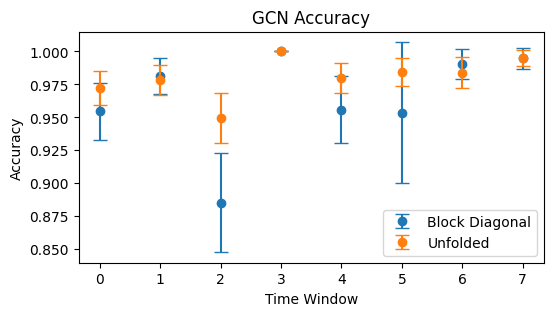

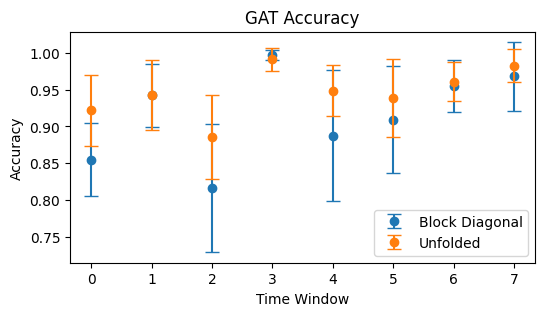

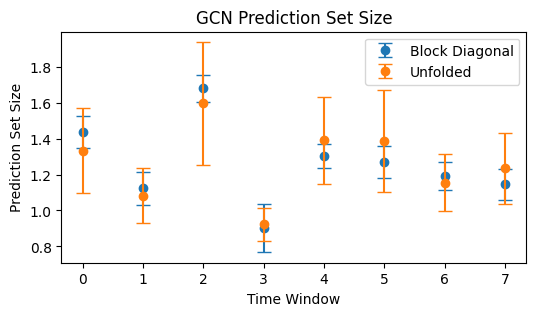

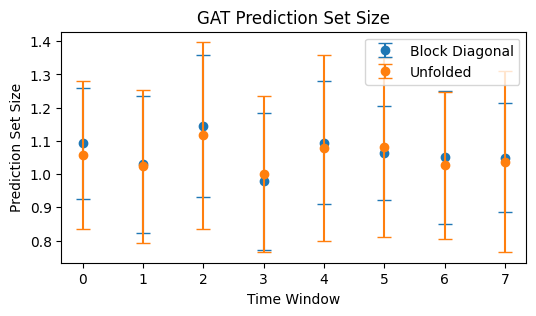

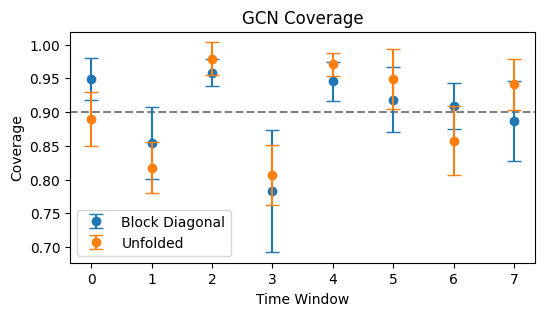

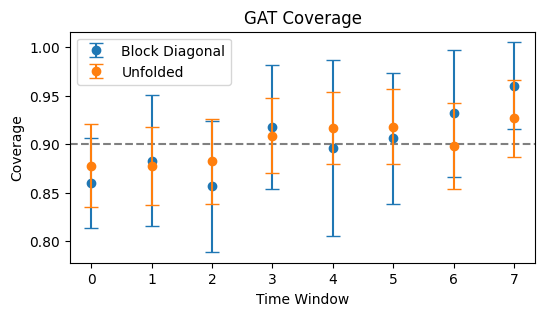

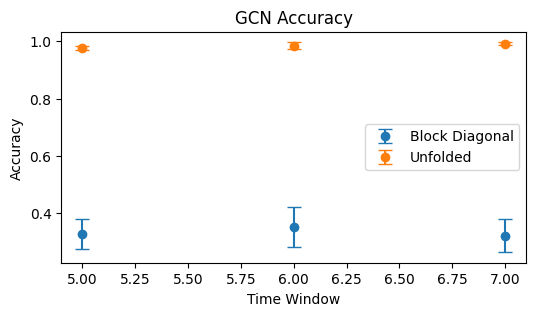

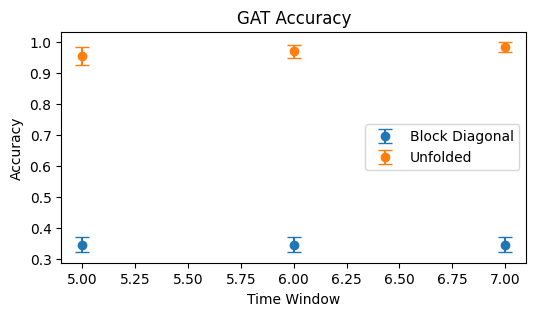

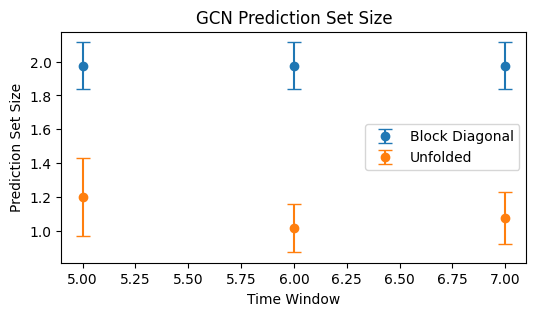

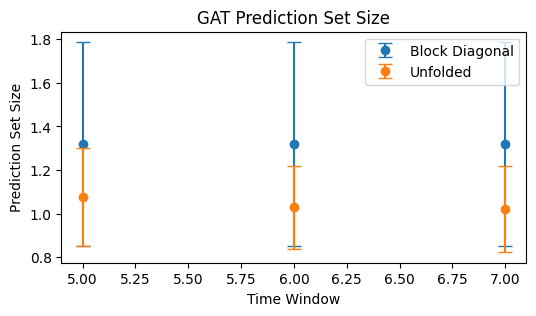

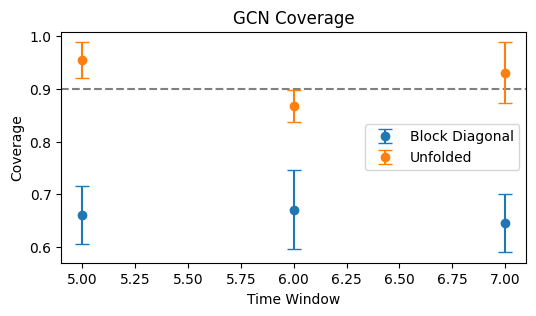

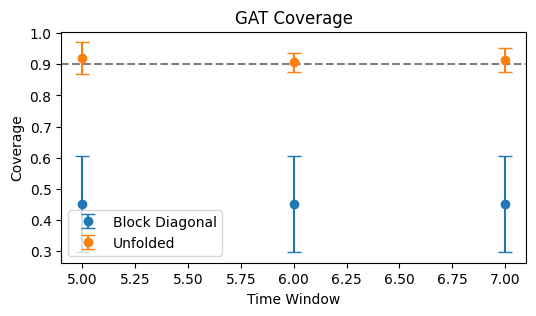

In [8]:
for (regime, output) in product(regimes, outputs):
    if output == 'Accuracy':
        output_str = 'Accuracy'
    if output == 'Avg Size':
        output_str = 'Prediction Set Size'
    if output == 'Coverage':
        output_str = 'Coverage'

    for GNN_model in GNN_models:
        fig, ax = plt.subplots(1, 1, figsize=(6.0, 3.0))
    
        T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

        output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        
        if output == 'Coverage':
            ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
        
        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Block Diagonal', zorder=2)
    
        output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Unfolded', zorder=3)
    
        ax.legend()
        
        ax.set_title(GNN_model + ' ' + output_str)
        ax.set_xlabel('Time Window')
        ax.set_ylabel(output_str)
        
        if save_figs:
            fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                        bbox_inches='tight');